In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astroquery.sdss import SDSS
from astropy import units as u
from astropy import constants as const
from astropy.units import imperial
h_0= 70*u.km/(u.s*u.Mpc)

In [2]:
from astroquery.sdss import SDSS
query = """
select 
    z, ra, dec, bestObjID
from specObj
where
    class = 'galaxy'
    and dec BETWEEN -1 AND 1
    and z > 0
    and zWarning = 0
"""

res = SDSS.query_sql(query)
res['d'] = ((const.c*res['z']/h_0)).to(u.Mpc)
res['ra'] = res['ra']*u.deg.to(u.rad)
res

z,ra,dec,bestObjID,d
,,,,Mpc
float64,float64,float64,int64,float64
4.140169e-06,2.778423321104337,-0.61985614,1237648720684777904,0.0177313063006486
5.522253e-06,0.9313714108351645,-0.059586,1237657586029691192,0.0236504257223982
9.391644e-06,0.8774737934845726,-0.1809153,1237666300555559178,0.0402220577060136
1.509442e-05,0.9265074051026592,-0.17364236,1237657586029625674,0.064645618198348
1.509728e-05,0.9483046825044761,-0.51145788,1237666300020458074,0.064657866861632
1.580001e-05,0.8858723003918767,0.355454,1237666301092627324,0.067667483347494
1.713978e-05,0.9466941624839058,-0.17378465,1237657586030084732,0.073405382511132
2.051342e-05,5.631563663887775,-0.289186,1237663457241989271,0.087853837196948


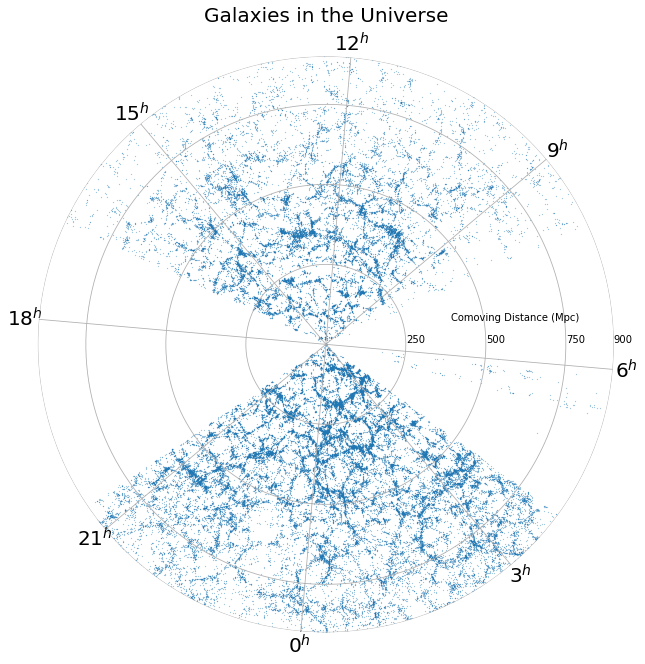

In [3]:
r = res['d'] 
theta =  res['ra']
f = plt.figure()
ax = f.add_axes([2, 2, 2, 2], polar=True) # Left, Bottom, Width, Height
ax.scatter(theta, r, marker='.', s=.1)
ax.set_rmax(900)

ax.set_rticks([250,500,750,900])  # Less radial ticks

ax.set_rlabel_position(95)
ax.set_xticklabels(['$0^h$', '$3^h$', '$6^h$', '$9^h$', '$12^h$', '$15^h$','$18^h$','$21^h$'], fontsize=20)


ax.set_title("Galaxies in the Universe",fontsize=20 )
ax.text(1.85,400,"Comoving Distance (Mpc)")


ax.set_theta_offset((-np.pi/2)-.087)

